In [1]:
import numpy as np
import os
from os import path as osp
from matplotlib import pyplot as plt

In [2]:
BUCKET_MNT='/mnt/disks/gs2/outputs'
exprs_root = osp.join(BUCKET_MNT, 'xm/checkpoints')

def get_suffix(expr_config):
    cfg, seed, step, nsmp = expr_config['cfg'], expr_config['seed'], expr_config['step'], expr_config['nsmp']
    return f"cfg-{cfg}-seed-{seed}-step-{step}-nsmp-{nsmp}"

In [3]:
expr_name = 'test-DiT-L-2024-Nov-07-22-47-32'
expr_config = {'cfg':1.5, 'seed': 0, 'step': 50, 'nsmp': 10000}

expr_path = osp.join(exprs_root, expr_name)
folder_suffix = get_suffix(expr_config)
assert expr_path, f"expriment {expr_name} not found"
print(os.listdir(expr_path))

['ckpt', 'config.json', 'logs', 'samples']


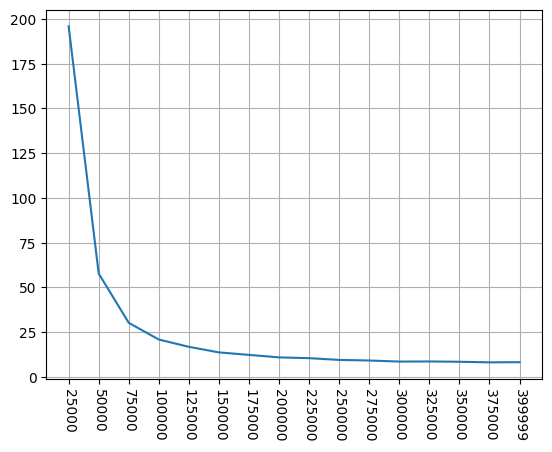

In [4]:
ckpts = os.listdir(osp.join(expr_path, 'samples'))
fids = {}
for ckpt in ckpts:
    ckpt_path = osp.join(expr_path, 'samples', ckpt)
    metric_file = [f for f in os.listdir(ckpt_path) if f.endswith(f'{folder_suffix}-metrics.npy')][0]
    assert metric_file, f"metric file not found in {ckpt_path}"
    metric = np.load(osp.join(ckpt_path, metric_file), allow_pickle=True).item()
    fids[ckpt] = metric['eval-10000-50/fid']

fids = {x[0]:x[1] for x in sorted(fids.items(), key=lambda x: int(x[0]))}
plt.plot(list(fids.keys()), list(fids.values()))
plt.xticks(rotation=-90)
plt.grid()
plt.show()

In [10]:
for ckpt, fid in fids.items():
    print(f"{int(ckpt)//1000}k: fid={fid:.2f}")

25k: fid=195.91
50k: fid=57.76
75k: fid=30.20
100k: fid=20.87
125k: fid=16.80
150k: fid=13.68
175k: fid=12.29
200k: fid=10.90
225k: fid=10.46
250k: fid=9.48
275k: fid=9.15
300k: fid=8.55
325k: fid=8.62
350k: fid=8.44
375k: fid=8.12
399k: fid=8.21
